# Problem klasifikacije u League of Legends

League of Legends. Vjerojatno najveća online igra svih vremena i životni izbor za neke ljude, ali je li moguće predvidjeti ishod igre na temelju statistike u prvih 10 minuta?

Prema <a href='https://leagueoflegends.com'>leagueoflegends.com</a>
> League of Legends je timska strateška igra u kojoj se dva tima od pet moćnih junaka suočavaju kako bi uništili bazu druge ekipe.

## Osnove igre

- Igrači skupljaju gold i iskustvo kombinacijom ubijanja miniona, čudovišta, drugih igrača i tornjeva.
        Više zlata -> bolji itemi -> lakše ubiti protivnika.
        Više experienca -> viši leveli -> lakše ubiti protivnika.
- Wardovi pružaju preglednost na karti tako da možemo vidjeti druge igrače koji nas dolaze ubiti.
        Više wardova -> bolji bolja preglednost -> manje smrti.
- Glavni cilj igre je uništiti određeni broj tornjeva što dovodi do uništenja protivničke baze.
        Ubij tornjeve -> ubij bazu -> pobijedi u igri.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

print('Učitavanje biblioteka nužnih za izgradnju projekta')

Učitavanje biblioteka nužnih za izgradnju projekta


## Istraživanje podataka
Cilj ovog projekta je pokušati predvidjeti klasu za **blueWins**, što je odgovarajući ishod igre. To možemo učiniti vizualizacijom značajki u sljedećem podatkovnom okviru i naknadnom upotrebom tehnika strojnog učenja za pronalaženje najboljih predviđanja.

Započinjemo pregledom različitih značajki koje imamo na raspolaganju u danom skupu podataka.

In [ ]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
cols = df.columns
print(cols)

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')


#### Ciljna varijabla "blueWins"
Odvojimo ciljnu varijablu iz podatkovnog okvira u novu varijablu "y". 

"gameId" se također može izostaviti jer je nasumičan i ne daje nikakvu informacijsku dobit opažanjima u podacima.

In [ ]:
y = df.blueWins
drop_cols = ['gameId','blueWins']
x = df.drop(drop_cols, axis=1)
x.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Naš skup podataka pruža gotovo 50/50 podataka za našu ciljnu varijablu, što znači da nema neuravnoteženosti podataka.

Red Wins: 4949 (50.096%), Blue Wins: 4930(49.904%)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


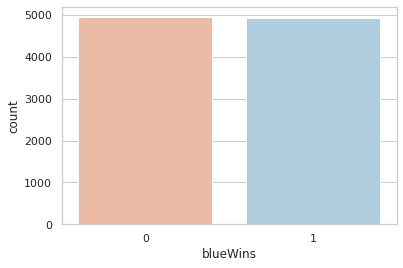

In [ ]:
# Vizualizacija blueWins 
ax = sns.countplot(y, label='Count', palette='RdBu')
W, L = y.value_counts()

print('Red Wins: {} ({}%), Blue Wins: {}({}%)'.format(W,round(100*W/(W+L),3),L,round(100*L/(W+L),3)))

- Primijetite da numerički podaci imaju vrlo različite raspone, što daje veće težine većim u modelima strojnog učenja. Dakle moramo standardizirat.

### Analiza osnovnih statistika
Numerički podaci u našem skupu podataka imaju vrlo različite raspone što bi moglo utjecati na učinkovitost modela strojnog učenja primjenom različitih težina na različite značajke.

**Diskretni podaci**
- Plavi/crveni wardovi postavljeni/uništeni imaju veliki domet i sdev.
- Plava/crvena elitna čudovišta jednaka su zmajevima + heraldima, zmajevi su popularniji za ubijanje.
- Plavi/crveni tim imaju ukupno imaju nisku sdev (srednja vrijednost < 10%) za gold i minion smrt.
- Razlika plavog tima za gold i experience je točan negativ razlike crvenog golda i experience 

**Binarni podaci**
- Plava/crvena First blood ( prvi put kada neko u igri umre) je da/ne s približno 50% pouzdanosti.

In [ ]:
x.describe()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [ ]:
# Odstranjujemo podatke crvenog tima koji nam nisu bitni
drop_cols = ['redFirstBlood','redKills','redDeaths'
             ,'redGoldDiff','redExperienceDiff', 'blueCSPerMin',
            'blueGoldPerMin','redCSPerMin','redGoldPerMin']
x.drop(drop_cols, axis=1, inplace=True)
x.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,15,6,8,0,0,0,0,16567,6.8,17047,197,55
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,12,1,2,2,1,1,1,17620,6.8,17438,240,52
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,15,3,14,0,0,0,0,17285,6.8,17254,203,28
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,15,2,10,0,0,0,0,16478,7.0,17961,235,47
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,17,2,7,1,1,0,0,17404,7.0,18313,225,67


### Violin and Box Plots
Violin plots omogućuju nam jednostavnu vizualizaciju distribucije svake značajke i odvajanje podatkovnih točaka na temelju konačnog ishoda igre.

**Zapažanja s plota**
- Čini se da killovi plavog tima imaju veliki pozitivan utjecaj na pobjedu u igri.
- Slično tome, smrt plavog tima ima veliki negativan utjecaj na pobjedu u igri (tj. pozitivan na gubitak).
- Asistencije imaju sličan plot kao i killovi plavog tima,što je i očekivano jer potrebno je ubiti igrača da bi se dobila asistencija.
- First blood je u pozitivnoj korelaciji s ishodom
- Razlike u goldu i experienceu imaju veliki utjecaj.
- Minions i minions Jungle nemaju veliki utjecaj.

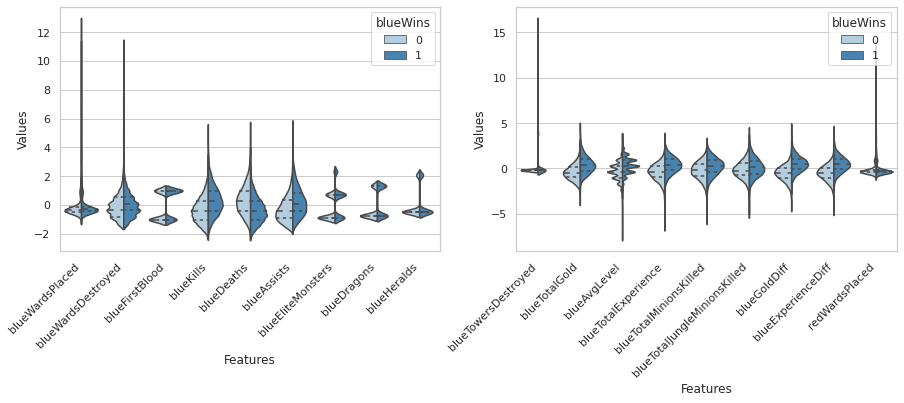

In [ ]:
#matricu značajki i standardiziranje
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:9]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[0], palette='Blues')
fig.autofmt_xdate(rotation=45)

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 9:18]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

# Create violin plot
#plt.figure(figsize=(8,5))
sns.violinplot(x='Features', y='Values', hue='blueWins', 
               data=data, split=True, inner='quart', ax=ax[1], palette='Blues')
fig.autofmt_xdate(rotation=45)

plt.show()

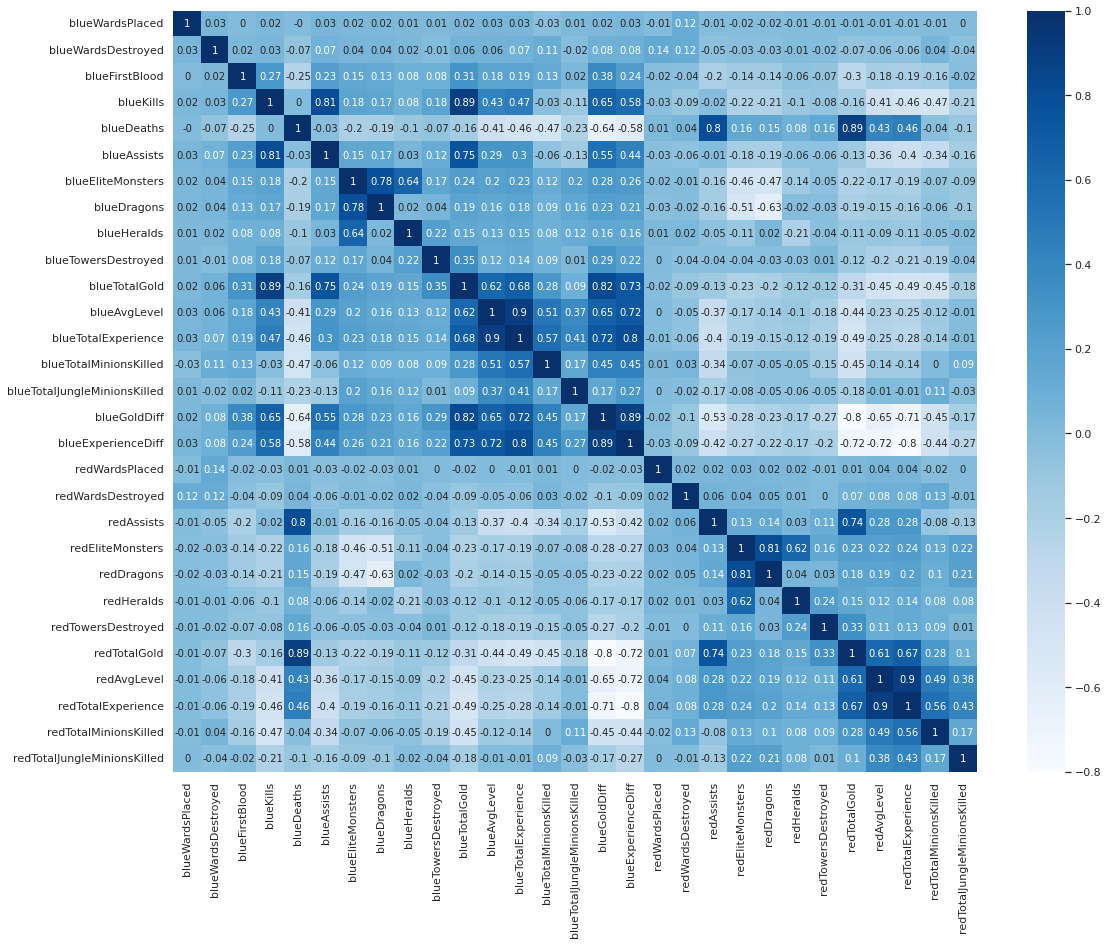

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(round(x.corr(),2), cmap='Blues', annot=True)
plt.show()

In [ ]:
# Ponovno odstranjujemo podatke
drop_cols = ['redAvgLevel','blueAvgLevel']
x.drop(drop_cols, axis=1, inplace=True)

### Killovi, Asistencije i smrti
Distribucija killova, smrti i asistencija izgleda slično, asistencije naravno skaliraju s ubojstvima (ili crvene asistencije s plavim smrtima) tako da su histogrami očekivani.

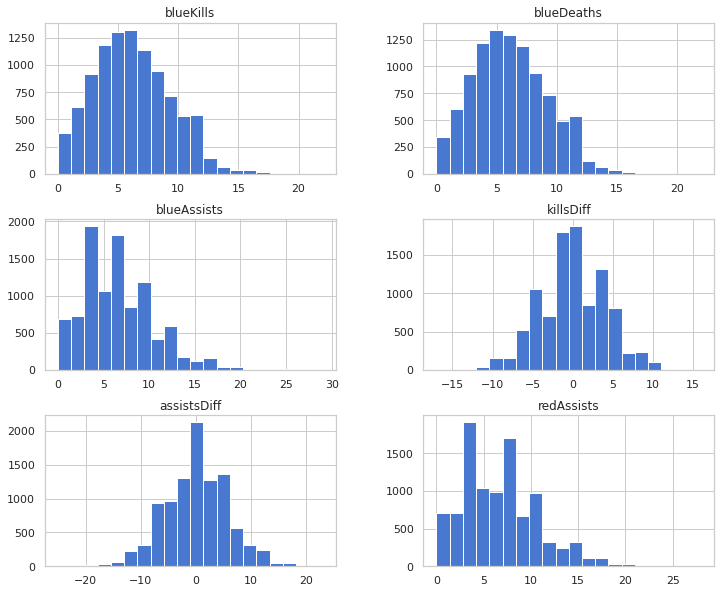

In [ ]:
x['killsDiff'] = x['blueKills'] - x['blueDeaths']
x['assistsDiff'] = x['blueAssists'] - x['redAssists']

x[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].hist(figsize=(12,10), bins=20)
plt.show()

Važnost svake značajke na ishod igre može se prikazati u nastavku, gdje ishod nije predstavljen samo ovim značajkama, postoji jasna korelacija.

Uključujemo **killsDiff** i **assistsDiff** u modeliranje.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you ma

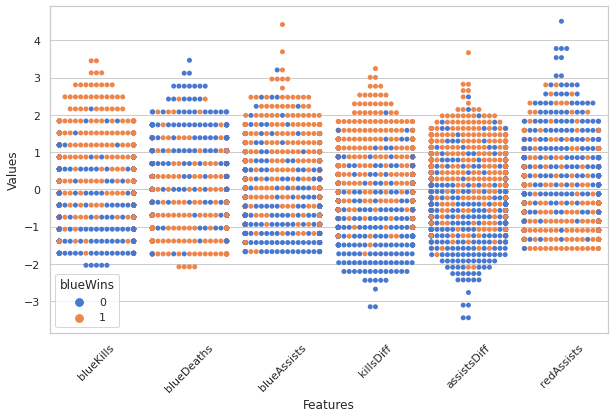

In [ ]:
sns.set(style='whitegrid', palette='muted')

data = x[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

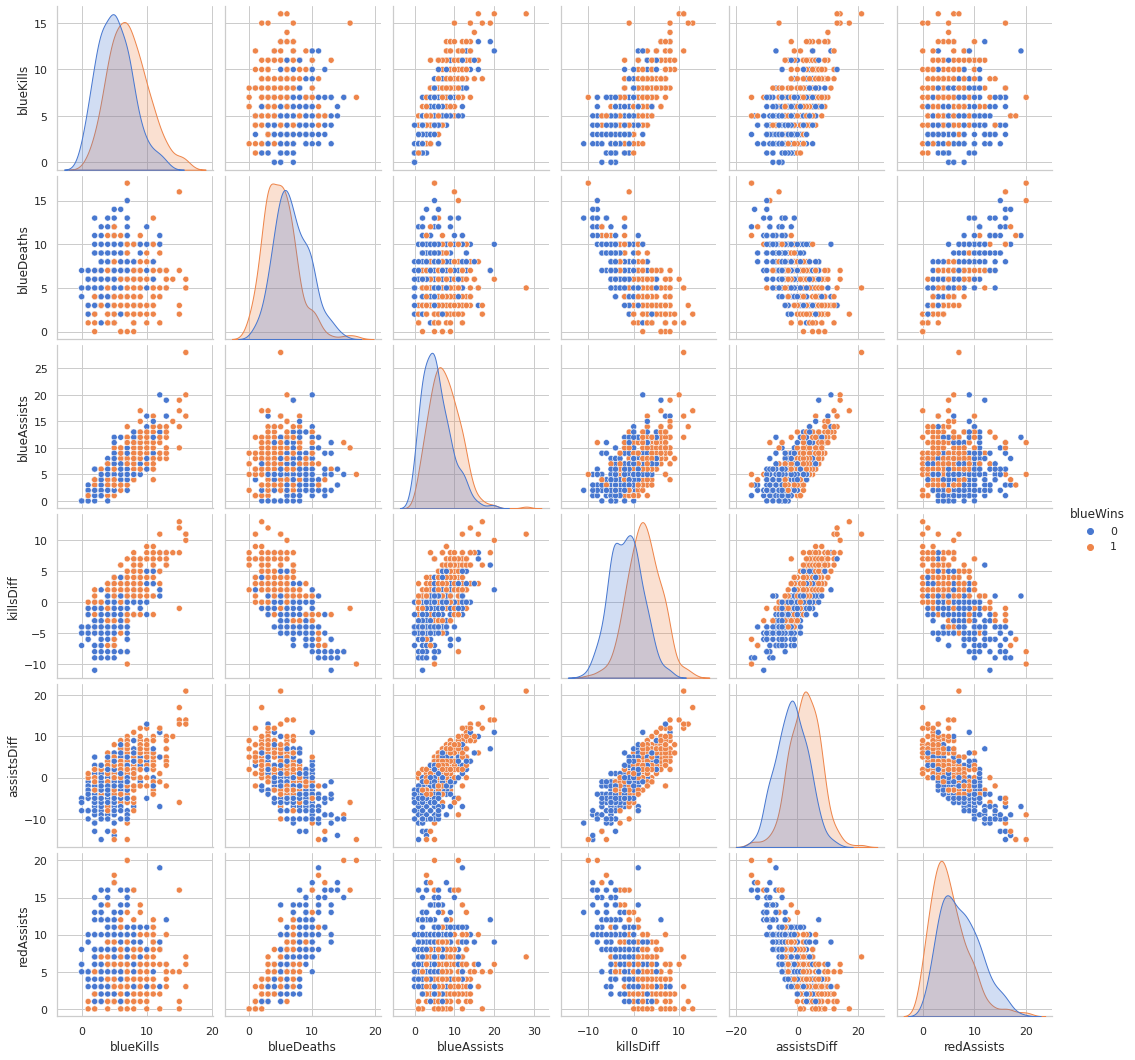

In [ ]:
data = pd.concat([y, x], axis=1).sample(500)

sns.pairplot(data, vars=['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists'], 
             hue='blueWins')

plt.show()

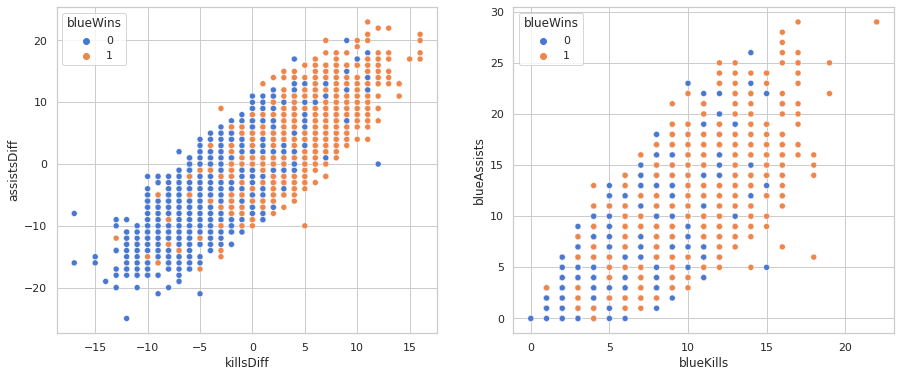

In [ ]:
data = pd.concat([y, x], axis=1)

fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.scatterplot(x='killsDiff', y='assistsDiff', hue='blueWins', data=data, ax=ax[0])

sns.scatterplot(x='blueKills', y='blueAssists', hue='blueWins', data=data, ax=ax[1])
plt.show()

In [ ]:
#ponovno odstranjujemo  podatke
drop_cols = ['blueFirstBlood','blueKills','blueDeaths','blueAssists','redAssists']
x.drop(drop_cols, axis=1, inplace=True)

### Elitna čudovišta
Uključivanje sve tri značajke kao što su **blueEliteMonsters**, **blueDragons** i **blueHeralds** ne bi bilo preporučljivo jer je prva od njih akumulacija ostalih. Grupiranje podataka u nastavku pokazuje da prednost zmaja daje veću prednost nego prednost heralda.

Zmajevi pokazuju 64% šanse za pobjedu ako ubije zmaja prije 10 minuta, 50% ako ima jednak broj zmajeva i 37% šanse ako je suprotni tim ubio zmaja. 

Zmajevi imaju veći utjecaj od hearlada na ishod igre, stoga odlučujem uključiti i **heralda** i **zmajeve** u model kasnije.

eliteDiff
-2    0.286301
-1    0.368772
 0    0.500683
 1    0.632093
 2    0.735211
Name: blueWins, dtype: float64
dragonsDiff
-1    0.374173
 0    0.500000
 1    0.640940
Name: blueWins, dtype: float64
heraldsDiff
-1    0.387729
 0    0.498680
 1    0.595046
Name: blueWins, dtype: float64


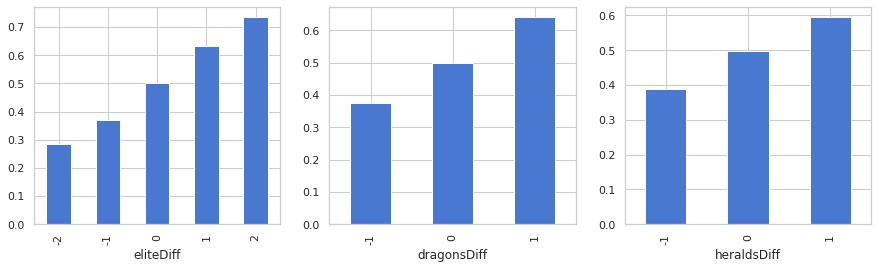

In [ ]:
x['dragonsDiff'] = x['blueDragons'] - x['redDragons']
x['heraldsDiff'] = x['blueHeralds'] - x['redHeralds']
x['eliteDiff'] = x['blueEliteMonsters'] - x['redEliteMonsters']

data = pd.concat([y, x], axis=1)

eliteGroup = data.groupby(['eliteDiff'])['blueWins'].mean()
dragonGroup = data.groupby(['dragonsDiff'])['blueWins'].mean()
heraldGroup = data.groupby(['heraldsDiff'])['blueWins'].mean()

fig, ax = plt.subplots(1,3, figsize=(15,4))

eliteGroup.plot(kind='bar', ax=ax[0])
dragonGroup.plot(kind='bar', ax=ax[1])
heraldGroup.plot(kind='bar', ax=ax[2])

print(eliteGroup)
print(dragonGroup)
print(heraldGroup)

plt.show()

In [ ]:
# ponovno odstranjujemo podatke
drop_cols = ['blueEliteMonsters','blueDragons','blueHeralds',
            'redEliteMonsters','redDragons','redHeralds']
x.drop(drop_cols, axis=1, inplace=True)

### Tornjevi
Glavni cilj za svaku ekipu i stoga bismo trebali očekivati da ćemo imati veliki utjecaj na ishod igre.

Grafički prikazi u nastavku pokazuju da, iako je malo vjerojatno da će biti uništenih tornjeva u prvih deset minuta igre, uništenje tornja daje veliku prednost timu i stoga će biti uključeno u kasniji model **towerDiff**.

towerDiff
-2      27
-1     347
 0    9064
 1     406
 2      28
 3       6
 4       1
Name: blueWins, dtype: int64
towerDiff
-2    0.185185
-1    0.216138
 0    0.498124
 1    0.741379
 2    0.964286
 3    1.000000
 4    1.000000
Name: blueWins, dtype: float64


Text(0, 0.5, 'Count')

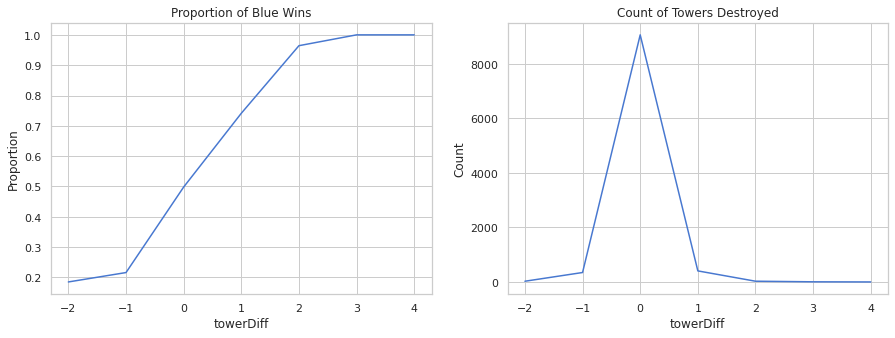

In [ ]:
x['towerDiff'] = x['blueTowersDestroyed'] - x['redTowersDestroyed']

data = pd.concat([y, x], axis=1)

towerGroup = data.groupby(['towerDiff'])['blueWins']
print(towerGroup.count())
print(towerGroup.mean())

fig, ax = plt.subplots(1,2,figsize=(15,5))

towerGroup.mean().plot(kind='line', ax=ax[0])
ax[0].set_title('Proportion of Blue Wins')
ax[0].set_ylabel('Proportion')

towerGroup.count().plot(kind='line', ax=ax[1])
ax[1].set_title('Count of Towers Destroyed')
ax[1].set_ylabel('Count')

In [ ]:
# ponovno odstranjujemo podatke
drop_cols = ['blueTowersDestroyed','redTowersDestroyed']
x.drop(drop_cols, axis=1, inplace=True)

### Gold i Experience

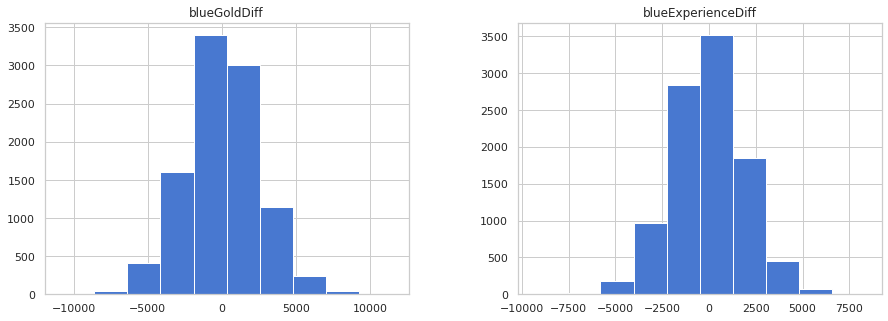

In [ ]:
data = pd.concat([y, x], axis=1)

data[['blueGoldDiff','blueExperienceDiff']].hist(figsize=(15,5))
plt.show()

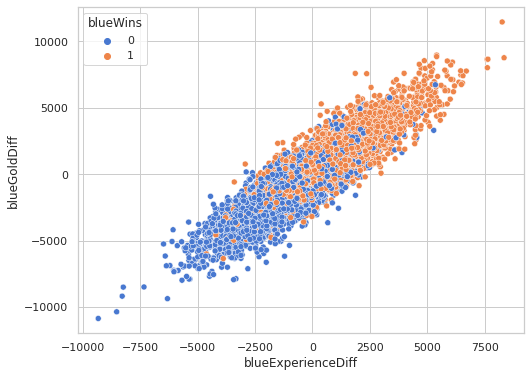

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='blueExperienceDiff', y='blueGoldDiff', hue='blueWins', data=data)

In [ ]:
# ponovno odstranjujemo nepotrebne podatke
drop_cols = ['blueTotalGold','blueTotalExperience','redTotalGold','redTotalExperience']
x.drop(drop_cols, axis=1, inplace=True)

x.rename(columns={'blueGoldDiff':'goldDiff', 'blueExperienceDiff':'expDiff'}, inplace=True)

### Minions and Jungle Minions

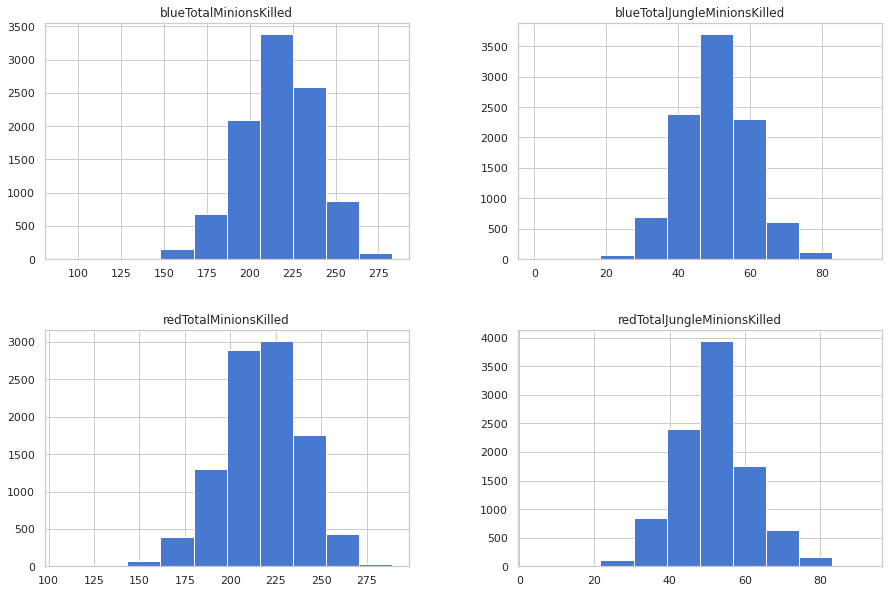

In [ ]:
data = pd.concat([y, x], axis=1)

data[['blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
      'redTotalMinionsKilled','redTotalJungleMinionsKilled']].hist(figsize=(15,10))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


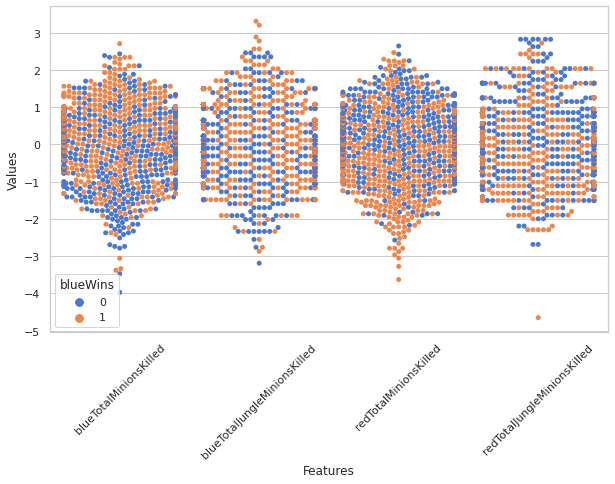

In [ ]:
sns.set(style='whitegrid', palette='muted')

data = x[['blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
      'redTotalMinionsKilled','redTotalJungleMinionsKilled']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# ponovno odstranjujemo podatke
drop_cols = ['blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
      'redTotalMinionsKilled','redTotalJungleMinionsKilled']
x.drop(drop_cols, axis=1, inplace=True)

## Strojno učenje
U nastavku koristim neke algoritme strojnog učenja iz biblioteke Scikit-Learn da vidim koliko su značajke koje sam gore odabrao učinkovite za predviđanje ishoda igre.

In [ ]:
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
print(x.shape,y.shape)
x.head()

(9879, 12) (9879,)


,blueWardsPlaced,blueWardsDestroyed,goldDiff,expDiff,redWardsPlaced,redWardsDestroyed,killsDiff,assistsDiff,dragonsDiff,heraldsDiff,eliteDiff,towerDiff
0,28,2,643,-8,15,6,3,3,0,0,0,0
1,12,1,-2908,-1173,12,1,0,3,-1,-1,-2,-1
2,15,0,-1172,-1033,15,3,-4,-10,1,0,1,0
3,43,1,-1321,-7,15,2,-1,-5,0,1,1,0
4,75,4,-1004,230,17,2,0,-1,-1,0,-1,0


In [ ]:
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7903, 12) (7903,)
Test set: (1976, 12) (1976,)


In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Algorithm', 'Accuracy', 'Recall', 'Precision', 'F-Score']

In [ ]:
def get_confusion_matrix(algorithm, y_pred, y_actual):
    #Kreiramo confusion matrix i tumač vrijednosti
    con = confusion_matrix(y_test, y_pred)
    tp, fn, fp, tn = con[0][0], con[0][1], con[1][0], con[1][1]
    algorithm = algorithm
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f_score = (2 * precision * recall) / (recall + precision)
    return algorithm, accuracy, recall, precision, f_score

### K-Nearest Neighbours 

In [ ]:
# testiramo raziličite vrijednosti k
Ks = 10
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    kneigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = kneigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

# Koristim najprecizniju k vrijednost za predviđanje ispitnih vrijednosti
k = mean_acc.argmax()+1
neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
y_pred = neigh.predict(X_test)

In [ ]:
# Pozivamo confusion matrix and accuracy
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('KNN', y_pred, y_test)

# Dodajem vrijednosti u tablicu
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

### Decision Trees

In [ ]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)
y_pred = drugTree.predict(X_test)

In [ ]:
# Pozivanje confusion matrix and accuracy
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('Decision', y_pred, y_test)

# Dodajem vrijednosti u tablicu
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

### Logistic Regression

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear')
y_pred = LR.fit(X_train,y_train).predict(X_test)

In [ ]:
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('LR', y_pred, y_test)
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

### Support Vector Machines

In [ ]:
clf = svm.SVC(kernel='rbf')
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [ ]:
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('SVM', y_pred, y_test)
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

### Naive Bayes

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('Bayes', y_pred, y_test)
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

### Random Forest

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [ ]:
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('R Forest', y_pred, y_test)
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

### Evaluacija modela strojnog učenja
**Logistička regresija** imala je najveću ocjenu točnosti od korištenih modela strojnog učenja s točnošću predviđanja od 74,646%. Budući da pokušavamo predvidjeti ishod igre, ne postoji veliki rizik povezan s lažno pozitivnim ili negativnim rezultatima i stoga gledamo na točnost najboljeg modela predviđanja.

In [ ]:
print(table)

+-----------+----------+---------+-----------+---------+
| Algorithm | Accuracy |  Recall | Precision | F-Score |
+-----------+----------+---------+-----------+---------+
|    KNN    | 0.71508  | 0.72256 |  0.71029  | 0.71637 |
|  Decision | 0.73077  | 0.77033 |  0.71241  | 0.74023 |
|     LR    | 0.74646  | 0.74289 |  0.74668  | 0.74478 |
|    SVM    | 0.73785  |  0.7439 |  0.73347  | 0.73865 |
|   Bayes   | 0.73178  | 0.73272 |  0.72976  | 0.73124 |
|  R Forest | 0.73785  | 0.74187 |  0.73441  | 0.73812 |
+-----------+----------+---------+-----------+---------+
